# Naural network hidden layers activation embeding

#### In this notebook we will use fully connected neural network for a classification task to improve visualizations algorithm from previous classes.

In the fully connected neural network, the output of each layer is computed using the activations from the previous one. In neural network training process, each successive layer learns to extract features from data with increasingly higher levels of abstraction. In this exercise, instead of directly visualizing data, we'll try to visualize the activation of hidden layers in neural networks. Using this idea, we can improve the process of data visualization, and on the other hand, see how processing this data looks like by a neural network.

In the first stage, we define simple architecture of the neural network and train it to recognize digits in the MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras import backend as K

from keras.datasets import mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split


%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

2024-03-27 11:23:08.356533: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-27 11:23:08.361063: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-27 11:23:08.415159: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-27 11:23:09.467142: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
nb_classes = 10

The dropout layers have the very specific function to drop out a random set of activations in that layers by setting them to zero in the forward pass. Simple as that.
It allows to avoid overfitting but has to be used only at training time and not at test time.

In [3]:
# set dropout rate - fractions of neurons to drop

dropout = 0.5

In [4]:
# build very simple neural network with 2 hidden layers

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dropout(dropout))
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

/home/przemek/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-03-27 11:23:10.873068: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-27 11:23:10.917080: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the r

In [5]:
# The binary_crossentropy loss expects a one-hot-vector as input,
# so we apply the to_categorical function from keras.utilis to convert integer labels to one-hot-vectors.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


In [8]:
# split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5/6)

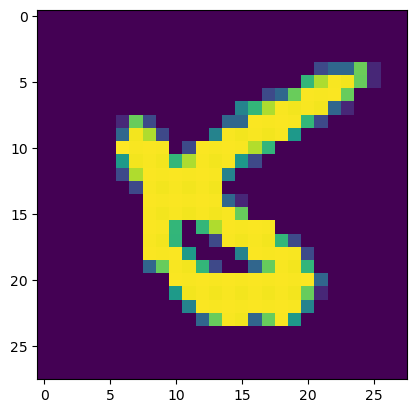

In [9]:
# show example digit
plt.imshow(X_train[0].reshape(28, 28))

In [10]:
# When we have defined and compiled the model, it can be trained using the fit function.
# We also use validation dataset to monitor validation loss and accuracy.

network_history = model.fit(X_train, Y_train, batch_size=128,
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6527 - loss: 1.0769 - val_accuracy: 0.9348 - val_loss: 0.2182
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9055 - loss: 0.3375 - val_accuracy: 0.9533 - val_loss: 0.1554
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9274 - loss: 0.2519 - val_accuracy: 0.9597 - val_loss: 0.1349
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9397 - loss: 0.2178 - val_accuracy: 0.9661 - val_loss: 0.1126
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9486 - loss: 0.1855 - val_accuracy: 0.9690 - val_loss: 0.1006
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9532 - loss: 0.1698 - val_accuracy: 0.9718 - val_loss: 0.0963
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9559 - loss: 0.1564 - val_accuracy: 0.9734 - val_loss: 0.0917
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9606 - loss: 0.1425 - val_accuracy: 0.

In [11]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

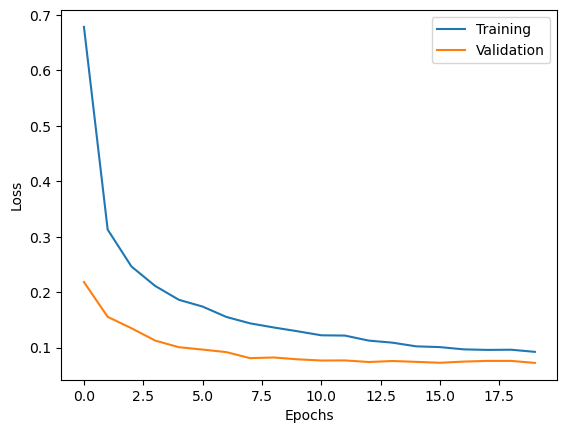

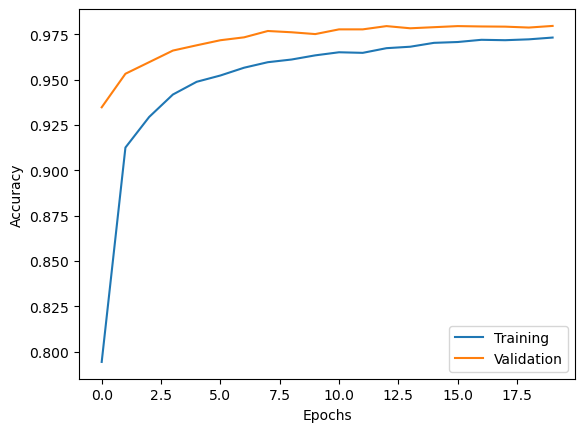

In [12]:
# fit function return keras.callbacks.History object which contains the entire history
# of training/validation loss, accuracy and other metrices for each epoch.
# We can therefore plot the behaviour of loss and accuracy during the training phase.

plot_history(network_history)

In [13]:
# Keras Model have summary function, that print data about model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,176 (2.50 MB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,118 (1.66 MB)

In [14]:
# We are interested in downloading the activation of hidden layers, because the dropout layers are between them,
# we need to properly select the index of the three dense layers.
from keras.models import Model

get_layer_output = Model(inputs=model.inputs,
                                 outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output])


layer1_output, layer2_output, layer3_output = get_layer_output([X_train])

In [15]:
train_ids = [np.arange(len(Y_train))[Y_train[:,i] == 1] for i in range(10)]

The 2 graphs below are not directly related to the topic of the exercise, but they visualize very well how neuron activation actives work and for explanation are included.

In [16]:
%%capture
%matplotlib inline
import tensorflow as tf


# this animation shows what the example number 5 looks like
# and what activations of neurons look in hidden layers of the neural network



# digit to be plotted
digit = 5

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)

def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(tf.reshape(X_train[train_ids[digit][id]], (28, 28)), animated=True,)
    layer1_plot = ax2.imshow(tf.reshape(layer1_output[train_ids[digit][id]],(16,16)), animated=True)
    layer2_plot = ax3.imshow(tf.reshape(layer2_output[train_ids[digit][id]],(8,8)), animated=True)
    output_plot = ax4.imshow(np.append(layer3_output[train_ids[digit][id]],
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [17]:
ani

In most cases the same subset of neurons fires, while other neurons remain quiescent. This is much more obvious in the second hidden layer than in the first hidden layer and can be interpreted as the first layer pre-processesing the pixel data, while the second layer deals with pattern recognition.

This effect is mainly caused by regularization forced by dropout. Dropout generally leads to the sparse weight matrices where a significant part of connection weights are close to 0. Insignificant weights are suppressed.


Optional, nonobligatory task:
You can easily see how the visualizations change if you comment lines responsible for the dropout "model.add(Dropout(dropout))".
Remember to change "get_layer_output", because after removing the dropout, the dense layers will have indexes: 0,1,2.


In [18]:
%%capture
%matplotlib inline


# Let's check the similarity in behavior for frames showing the same digit by looking at the ensemble properties.
# In this case, ensemble properties refers to how the neurons behave on average
# for a large number of frames showing the same digit.

# digit to be plotted
digit = 6

# numbers of frames to be summed over
n = np.append([1], np.linspace(5, 100, 20, dtype=int))

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# add a counter indicating the number of frames used in the summation
counter = ax1.text(1, 2, 'n={}'.format(0), color='white', fontsize=16, animated=True)

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)

def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(tf.reshape(np.sum(tf.gather(X_train,train_ids[digit][:id]), axis=0),(28,28)), animated=True)
    layer1_plot = ax2.imshow(tf.reshape(np.sum(tf.gather(layer1_output,train_ids[digit][:id], axis=0), axis=0),(16,16)), animated=True)
    layer2_plot = ax3.imshow(tf.reshape(np.sum(tf.gather(layer2_output,train_ids[digit][:id], axis=0), axis=0),(8,8)), animated=True)
    output_plot = ax4.imshow(np.append(np.sum(tf.gather(layer3_output,train_ids[digit][:id]), axis=0), [np.nan, np.nan]).reshape((3,4)), animated=True)
    counter.set_text('n={}'.format(id))
    return digit_plot, layer1_plot, layer2_plot, output_plot, counter,
    return digit_plot

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [19]:
ani

After summing up the responses of as little as 20-30 frames, the pattern in the second hidden layer is almost static. After combining about 70-80 frames, also the pattern in the first hidden layer appears static. This supports the idea that only a subset of all neurons is involved in the recognition of individual digits.

Especially the above plot is important when we think about use of neural networks for data visualization. We can clearly see that the activation generated by examples belonging to the same class are less chaotic than the examples themselves, therefore their visualization should give a more clustered structure

# Task 1

- Project a MNIST training part into 2-dimensional space using t-SNE, TriMAP, PaCMAP and UMAP.

- Use layer1_output and layer2_output to project first and second hidden layers of neural network into a 2-dimensional space. Also divided into a test and training set, use the same methods as the point above.

- Also visualize the test part.

- Try to use 2-dimensional projection for classification task.

- Use embeddings lerned on raw train data (and also on hidden activations of train data) to transform test data (and also hidden activations of test data) into 2-dimensional space.

- Use the k-nearest neighbors algorithm to classify transformed points from the test set. Use the KNN algorithm in which you will use points from the training set as a neighbor with known class assignment. Because t-SNE is a non-linear, non-parametric embedding you cant use already learned t-SNE to transform new points into the existing embedded space. So for this part, use only UMAP with have fit_transform method (learn manifold) and also transform (only project new data to existing manifold). Try with few values of n_neighbors e.g [3, 5, 10]

- Estimate the accuracy of classification using this approach. Use all 3 layers (raw data, 1 hidden layer, 2 hidden layer) and few values of n_neighbors

COMMENT:
I have dropped TSNE from experimetns as we're not going to use it anyway for predictions and it makes computation time shorter.
I have also droped pacmap as I had some problems with numba versions.

Simplified description from above:
- MNIST into 2D embedding
- layer1 and layer2 outputs into emebddings

In [20]:
import umap
import trimap
# import pacmap
transformed_datasets = {}

In [21]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [22]:
get_layer_output = Model(inputs=model.inputs,
                                 outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output])


layer1_output, layer2_output, layer3_output = get_layer_output([X_train])
layer1_output.shape

TensorShape([50000, 256])

UMAP
TRIMAP


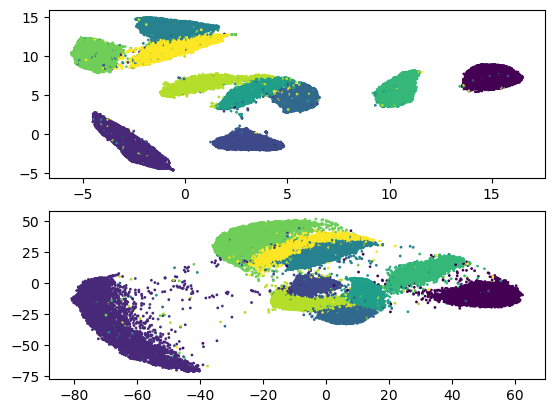

In [35]:
models = [
 (umap.UMAP(), 'UMAP'),
 (trimap.TRIMAP(), 'TRIMAP'),
]
fig, axs = plt.subplots(2, 1)
# mnist
for idx, (model2d, name) in enumerate(models):
    print(name)
    data_transformed = model2d.fit_transform(X_train.reshape(-1, 28*28))
    transformed_datasets[f'{name}_mnist'] = data_transformed, model2d
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_train, axis=1), s = 1)
plt.show()

UMAP
TRIMAP


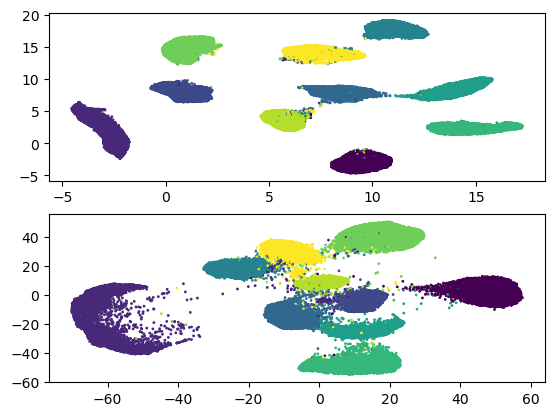

In [24]:
models = [
 (umap.UMAP(), 'UMAP'),
 (trimap.TRIMAP(), 'TRIMAP'),
]
fig, axs = plt.subplots(2, 1)
# mnist
for idx, (model2d, name) in enumerate(models):
    print(name)
    data_transformed = model2d.fit_transform(layer1_output)
    transformed_datasets[f'{name}_layer1'] = data_transformed, model2d
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_train, axis=1), s = 1)
plt.show()

UMAP


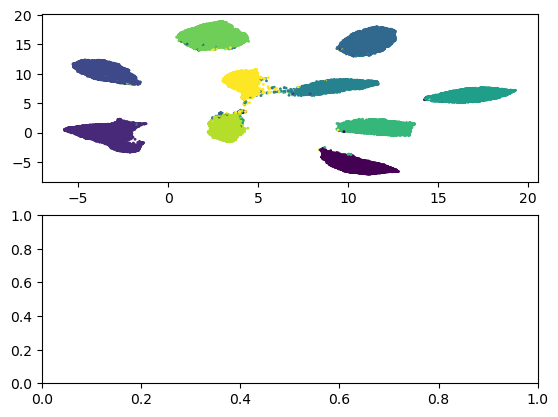

In [25]:
models = [
 (umap.UMAP(), 'UMAP'),
#  (trimap.TRIMAP(), 'TRIMAP'), # it was computing it for a very long time and didn't finish, so I decided to drop it
]
fig, axs = plt.subplots(2, 1)
# mnist
for idx, (model2d, name) in enumerate(models):
    print(name)
    data_transformed = model2d.fit_transform(layer2_output)
    transformed_datasets[f'{name}_layer2'] = data_transformed, model2d
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_train, axis=1), s = 1)
plt.show()

COMMENT:
Widzimy, że używając aktywacji z wartstwy 1 lub 2 jako inputu do UMAP/TriMAP uzyskujemy klastry które są dużo bardziej liniowo sepralowne niż używając surowego datasetu. Sugeruje to, że trenując KNN, na embedingach warstw uzyskammy lepsze wyniki.
Sprawdźmy te hipotezę!

In [26]:
layer1_output_test, layer2_output_test, layer3_output_test = get_layer_output([X_test])


In [36]:
# we only perform it for UMAP, as TriMAP hs no fit_transform function

model2d = transformed_datasets[f'UMAP_mnist'][1] # we have save model as second element in tuple
transformed_datasets[f'UMAP_mnist_test'] = model2d.transform(X_test)

model2d = transformed_datasets[f'UMAP_layer1'][1] # we have save model as second element in tuple
transformed_datasets[f'UMAP_layer1_test'] = model2d.transform(layer1_output_test)

model2d = transformed_datasets[f'UMAP_layer2'][1] # we have save model as second element in tuple
transformed_datasets[f'UMAP_layer2_test'] = model2d.transform(layer2_output_test)

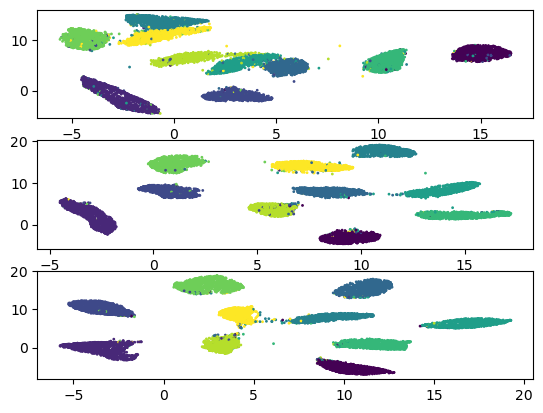

In [37]:
# visualizing ground truth
vis_layers = ['mnist', 'layer1', 'layer2']

fig, axs = plt.subplots(3, 1)
for idx, vis_layer in enumerate(vis_layers):
    data_transformed = transformed_datasets[f'UMAP_{vis_layer}_test']
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_test, axis=1), s = 1)
plt.show()

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

datasets = [
    transformed_datasets[f"UMAP_mnist"][0],
    transformed_datasets[f"UMAP_layer1"][0],
    transformed_datasets[f"UMAP_layer2"][0],
]

test_datasets = [
    transformed_datasets[f'UMAP_mnist_test'],
    transformed_datasets[f'UMAP_layer1_test'],
    transformed_datasets[f'UMAP_layer2_test'],
]


hiperparams = {
    "n_neigh": [3, 5, 10],
}

scores = []

for train_dataset, test_dataset in zip(datasets, test_datasets):

    accuracy = {}

    for n in hiperparams["n_neigh"]:

        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(train_dataset, Y_train)

        predictions = clf.predict(test_dataset)
        predictions = np.argmax(predictions, axis=1)

        accuracy[str(n)] = accuracy_score(y_test, predictions)

    scores.append(accuracy)


In [40]:
for accuracy in scores:
    print(accuracy)

{'3': 0.9484, '5': 0.9514, '10': 0.9513}
{'3': 0.968, '5': 0.9697, '10': 0.9694}
{'3': 0.9775, '5': 0.9784, '10': 0.9775}


COMMENT:
Widzimy, że accuracy jest wyższe kiedy używamy KNN na embeddingach z dalszych warstw. Potwierdza to hipotezę. Wyjaśnieniem jest to, że aktywacja konkretnych pixeli w np. 2. wartwie ukrytej dużo lepiej koreluje z wykryciem konkretnej cyfry. Dzięki temu algorytm embedujący takie pixele, może je lepiej liniowo rozdzielić - będą one bliższe punktom z tej samej klasy, a dalsze od innych klas.

# Task 2

Repeate the above training procedures and visualizations for FMNIST (or any other dataset of your choice)

In [46]:
from keras.datasets import fashion_mnist

In [47]:
# The binary_crossentropy loss expects a one-hot-vector as input,
# so we apply the to_categorical function from keras.utilis to convert integer labels to one-hot-vectors.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 26s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [48]:
X_train.shape

(60000, 28, 28)

In [49]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


In [50]:
# split training and validation data
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=5/6)

In [51]:
# When we have defined and compiled the model, it can be trained using the fit function.
# We also use validation dataset to monitor validation loss and accuracy.

network_history = model.fit(X_train, Y_train, batch_size=128,
                            epochs=20, verbose=1, validation_data=(X_val, Y_val))

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5081 - loss: 1.6590 - val_accuracy: 0.7796 - val_loss: 0.6024
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7054 - loss: 0.7748 - val_accuracy: 0.7992 - val_loss: 0.5586
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7407 - loss: 0.6925 - val_accuracy: 0.8239 - val_loss: 0.5097
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7588 - loss: 0.6380 - val_accuracy: 0.8314 - val_loss: 0.4772
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7779 - loss: 0.5945 - val_accuracy: 0.8359 - val_loss: 0.4731
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7910 - loss: 0.5725 - val_accuracy: 0.8400 - val_loss: 0.4502
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8011 - loss: 0.5466 - val_accuracy: 0.8405 - val_loss: 0.4409
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8050 - loss: 0.5346 - val_accuracy: 0.

In [52]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

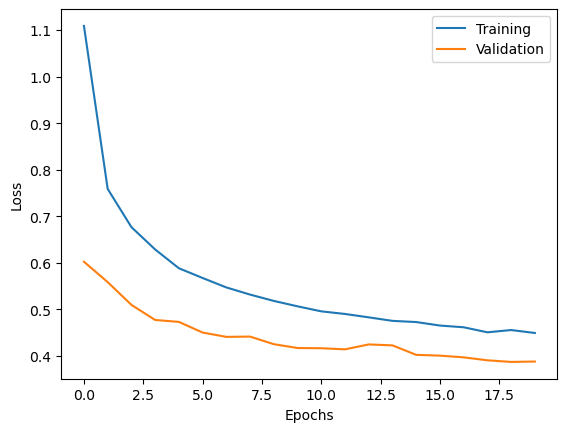

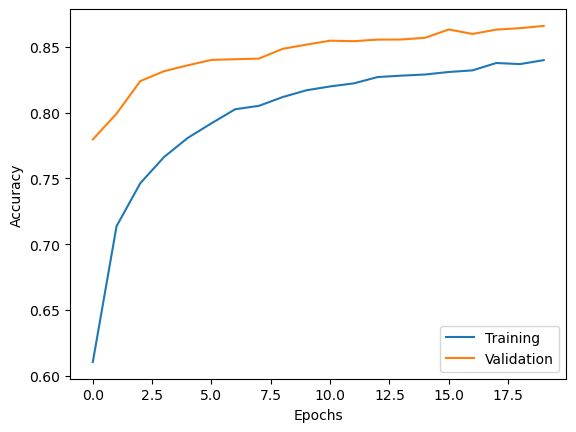

In [53]:
# fit function return keras.callbacks.History object which contains the entire history
# of training/validation loss, accuracy and other metrices for each epoch.
# We can therefore plot the behaviour of loss and accuracy during the training phase.

plot_history(network_history)

In [54]:
# Keras Model have summary function, that print data about model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 654,176 (2.50 MB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 436,118 (1.66 MB)

In [55]:
# We are interested in downloading the activation of hidden layers, because the dropout layers are between them,
# we need to properly select the index of the three dense layers.
from keras.models import Model

get_layer_output = Model(inputs=model.inputs,
                                 outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output])


layer1_output, layer2_output, layer3_output = get_layer_output([X_train])

In [56]:
train_ids = [np.arange(len(Y_train))[Y_train[:,i] == 1] for i in range(10)]

The 2 graphs below are not directly related to the topic of the exercise, but they visualize very well how neuron activation actives work and for explanation are included.

In [57]:
%%capture
%matplotlib inline
import tensorflow as tf


# this animation shows what the example number 5 looks like
# and what activations of neurons look in hidden layers of the neural network



# digit to be plotted
digit = 5

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)

def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(tf.reshape(X_train[train_ids[digit][id]], (28, 28)), animated=True,)
    layer1_plot = ax2.imshow(tf.reshape(layer1_output[train_ids[digit][id]],(16,16)), animated=True)
    layer2_plot = ax3.imshow(tf.reshape(layer2_output[train_ids[digit][id]],(8,8)), animated=True)
    output_plot = ax4.imshow(np.append(layer3_output[train_ids[digit][id]],
                                       [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [58]:
ani

In most cases the same subset of neurons fires, while other neurons remain quiescent. This is much more obvious in the second hidden layer than in the first hidden layer and can be interpreted as the first layer pre-processesing the pixel data, while the second layer deals with pattern recognition.

This effect is mainly caused by regularization forced by dropout. Dropout generally leads to the sparse weight matrices where a significant part of connection weights are close to 0. Insignificant weights are suppressed.


Optional, nonobligatory task:
You can easily see how the visualizations change if you comment lines responsible for the dropout "model.add(Dropout(dropout))".
Remember to change "get_layer_output", because after removing the dropout, the dense layers will have indexes: 0,1,2.


In [59]:
%%capture
%matplotlib inline


# Let's check the similarity in behavior for frames showing the same digit by looking at the ensemble properties.
# In this case, ensemble properties refers to how the neurons behave on average
# for a large number of frames showing the same digit.

# digit to be plotted
digit = 6

# numbers of frames to be summed over
n = np.append([1], np.linspace(5, 100, 20, dtype=int))

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# add a counter indicating the number of frames used in the summation
counter = ax1.text(1, 2, 'n={}'.format(0), color='white', fontsize=16, animated=True)

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)

def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(tf.reshape(np.sum(tf.gather(X_train,train_ids[digit][:id]), axis=0),(28,28)), animated=True)
    layer1_plot = ax2.imshow(tf.reshape(np.sum(tf.gather(layer1_output,train_ids[digit][:id], axis=0), axis=0),(16,16)), animated=True)
    layer2_plot = ax3.imshow(tf.reshape(np.sum(tf.gather(layer2_output,train_ids[digit][:id], axis=0), axis=0),(8,8)), animated=True)
    output_plot = ax4.imshow(np.append(np.sum(tf.gather(layer3_output,train_ids[digit][:id]), axis=0), [np.nan, np.nan]).reshape((3,4)), animated=True)
    counter.set_text('n={}'.format(id))
    return digit_plot, layer1_plot, layer2_plot, output_plot, counter,
    return digit_plot

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [60]:
ani

In [61]:
import umap
import trimap
# import pacmap
transformed_datasets = {}

In [62]:
get_layer_output = Model(inputs=model.inputs,
                                 outputs=[model.layers[0].output, model.layers[2].output, model.layers[4].output])


layer1_output, layer2_output, layer3_output = get_layer_output([X_train])
layer1_output.shape

TensorShape([50000, 256])

UMAP
TRIMAP


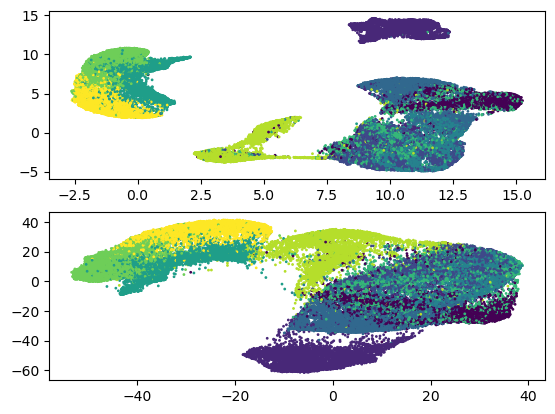

In [63]:
models = [
 (umap.UMAP(), 'UMAP'),
 (trimap.TRIMAP(), 'TRIMAP'),
]
fig, axs = plt.subplots(2, 1)
# mnist
for idx, (model2d, name) in enumerate(models):
    print(name)
    data_transformed = model2d.fit_transform(X_train.reshape(-1, 28*28))
    transformed_datasets[f'{name}_mnist'] = data_transformed, model2d
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_train, axis=1), s = 1)
plt.show()

UMAP
TRIMAP


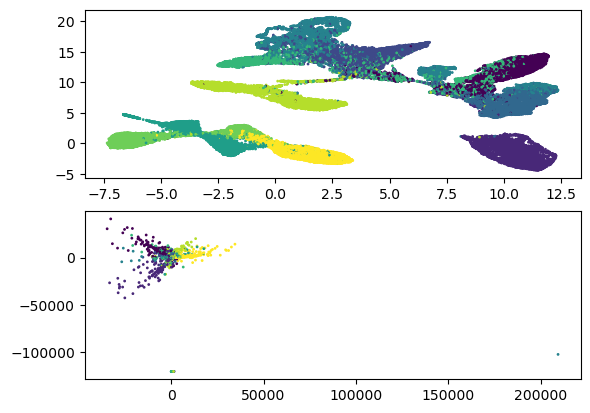

In [64]:
models = [
 (umap.UMAP(), 'UMAP'),
 (trimap.TRIMAP(), 'TRIMAP'),
]
fig, axs = plt.subplots(2, 1)
# mnist
for idx, (model2d, name) in enumerate(models):
    print(name)
    data_transformed = model2d.fit_transform(layer1_output)
    transformed_datasets[f'{name}_layer1'] = data_transformed, model2d
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_train, axis=1), s = 1)
plt.show()

UMAP


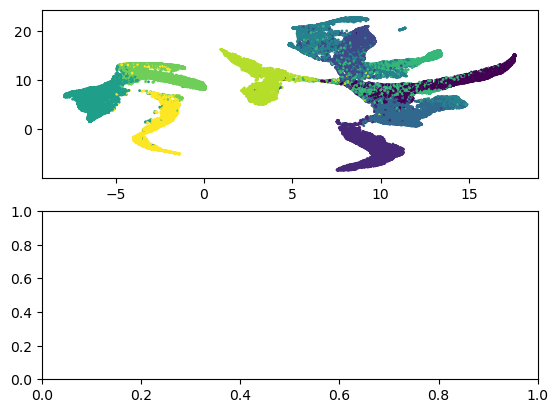

In [65]:
models = [
 (umap.UMAP(), 'UMAP'),
#  (trimap.TRIMAP(), 'TRIMAP'), # it was computing it for a very long time and didn't finish, so I decided to drop it
]
fig, axs = plt.subplots(2, 1)
# mnist
for idx, (model2d, name) in enumerate(models):
    print(name)
    data_transformed = model2d.fit_transform(layer2_output)
    transformed_datasets[f'{name}_layer2'] = data_transformed, model2d
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_train, axis=1), s = 1)
plt.show()

In [66]:
layer1_output_test, layer2_output_test, layer3_output_test = get_layer_output([X_test])


In [67]:
# we only perform it for UMAP, as TriMAP hs no fit_transform function

model2d = transformed_datasets[f'UMAP_mnist'][1] # we have save model as second element in tuple
transformed_datasets[f'UMAP_mnist_test'] = model2d.transform(X_test)

model2d = transformed_datasets[f'UMAP_layer1'][1] # we have save model as second element in tuple
transformed_datasets[f'UMAP_layer1_test'] = model2d.transform(layer1_output_test)

model2d = transformed_datasets[f'UMAP_layer2'][1] # we have save model as second element in tuple
transformed_datasets[f'UMAP_layer2_test'] = model2d.transform(layer2_output_test)

/home/przemek/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/home/przemek/anaconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


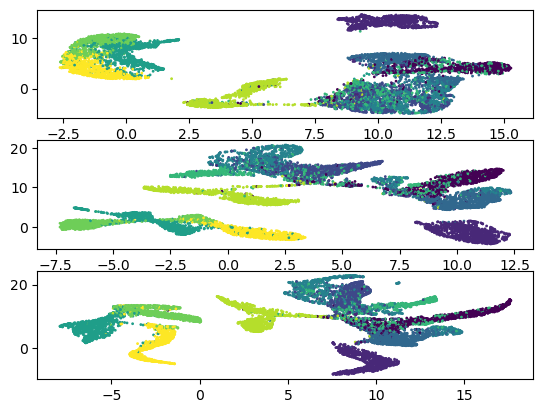

In [68]:
# visualizing ground truth
vis_layers = ['mnist', 'layer1', 'layer2']

fig, axs = plt.subplots(3, 1)
for idx, vis_layer in enumerate(vis_layers):
    data_transformed = transformed_datasets[f'UMAP_{vis_layer}_test']
    axs[idx].scatter(data_transformed[:, 0], data_transformed[:, 1], c=np.argmax(Y_test, axis=1), s = 1)
plt.show()

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

datasets = [
    transformed_datasets[f"UMAP_mnist"][0],
    transformed_datasets[f"UMAP_layer1"][0],
    transformed_datasets[f"UMAP_layer2"][0],
]

test_datasets = [
    transformed_datasets[f'UMAP_mnist_test'],
    transformed_datasets[f'UMAP_layer1_test'],
    transformed_datasets[f'UMAP_layer2_test'],
]


hiperparams = {
    "n_neigh": [3, 5, 10],
}

scores = []

for train_dataset, test_dataset in zip(datasets, test_datasets):

    accuracy = {}

    for n in hiperparams["n_neigh"]:

        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(train_dataset, Y_train)

        predictions = clf.predict(test_dataset)
        predictions = np.argmax(predictions, axis=1)

        accuracy[str(n)] = accuracy_score(y_test, predictions)

    scores.append(accuracy)


In [70]:
for accuracy in scores:
    print(accuracy)

{'3': 0.7317, '5': 0.7396, '10': 0.7258}
{'3': 0.8228, '5': 0.8271, '10': 0.822}
{'3': 0.8294, '5': 0.8342, '10': 0.8248}


COMMENT:
Obserwacje są podobne co w przypadku MNISTa, tzn. embeddingi wartw ukrytych dużo łatwiej jest spłaszczyć do dwóch wymiarów i są łatwiejsze do zklastrowania. Widzimy, że accuracy jest zdecydowanie wyższe kiedy używamy warsty ukrytej a nie surowego wejścia. Co ciekawe różnica między pierwszą a drugą warstwą ukrytą nie jest aż tak znacząca. Może to oznaczać, że dołożenie koeljnych warst liniowych (+ funkcja aktywacji) nie poprawia już znacząco naszego klasyfikatora i trzeba spróbować innego pomysłu np. sieci konwolucyjnych